<a href="https://colab.research.google.com/github/Manas-Kumar-Muduli/Hand_Gesture_Recognition_Task-04/blob/master/Prodigy_Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.utils import plot_model
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
images=[]
labels=[]

# oop over top 10 folders
for directory in os.listdir('/content/drive/MyDrive/prodigy_data/Task-4/leapGestRecog'):
    for subdir in os.listdir(os.path.join('/content/drive/MyDrive/prodigy_data/Task-4/leapGestRecog',directory)):
#         if directory=='01':
#             labels.append(subdir)
        for image in os.listdir(os.path.join('/content/drive/MyDrive/prodigy_data/Task-4/leapGestRecog',directory, subdir)):
            img_path = os.path.join('/content/drive/MyDrive/prodigy_data/Task-4/leapGestRecog', directory, subdir, image)
            images.append(img_path)
            labels.append(subdir)

In [ ]:
df = pd.DataFrame({'Image':images,'Label':labels})
df.tail()

,Image,Label
19245,/content/drive/MyDrive/prodigy_data/Task-4/lea...,10_down
19246,/content/drive/MyDrive/prodigy_data/Task-4/lea...,10_down
19247,/content/drive/MyDrive/prodigy_data/Task-4/lea...,10_down
19248,/content/drive/MyDrive/prodigy_data/Task-4/lea...,10_down
19249,/content/drive/MyDrive/prodigy_data/Task-4/lea...,10_down


[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


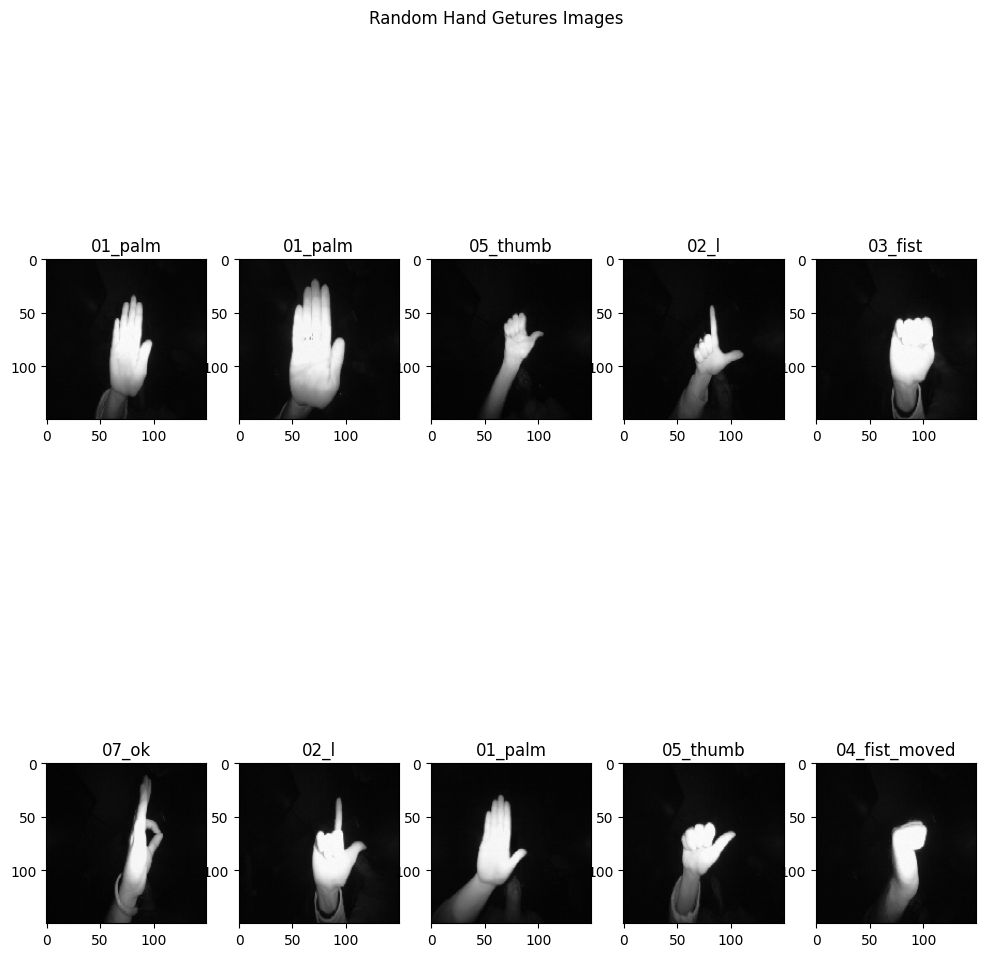

In [ ]:
df_img = df['Image']
df_label = df['Label']

nrows=2
ncols = 5
fig,axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand Getures Images")
print(axx)
# axx = axx.ravel()
for i in range(nrows):
        for j in range(ncols):
                n = np.random.randint(0,20000)
                img = load_img(df['Image'][n],target_size=(150,150)) #this is a PIL image
                img = img_to_array(img) #this is a numpy array with shape (3,150,150)
                img = np.expand_dims(img,axis=0) #expand image dimention to (1,3,255,255)
                img /= 255.0 #scale image values between 0,1
                label = df_label[n]
                #changing size from (1,150,150,3) into (150,150,3)
                image = np.squeeze(img)
                axx[i][j].imshow(image)
                axx[i][j].set_title(label)
plt.show()
plt.close()

In [ ]:
x_train,x = train_test_split(df, test_size = 0.3)
# train_x, test_x, train_y, test_y = train_test_split(images,labels,test_size=0.2)
x_valid,x_test = train_test_split(x,test_size=0.5)
x_train.info()
x_valid.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13475 entries, 1455 to 17757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   13475 non-null  object
 1   Label   13475 non-null  object
dtypes: object(2)
memory usage: 315.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2887 entries, 14709 to 5315
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2887 non-null   object
 1   Label   2887 non-null   object
dtypes: object(2)
memory usage: 67.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 2114 to 18035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   2888 non-null   object
 1   Label   2888 non-null   object
dtypes: object(2)
memory usage: 67.7+ KB


In [ ]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
b_size =1
train_generator = train_datagen.flow_from_dataframe(dataframe=x_train,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=True)
valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=False)

Found 13475 validated image filenames belonging to 10 classes.
Found 2887 validated image filenames belonging to 10 classes.


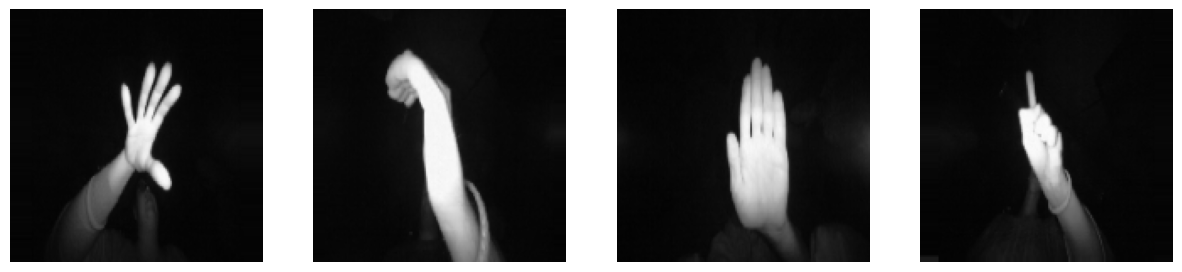

In [ ]:
#plot some augmented images
fig,axx = plt.subplots(nrows=1,ncols=4, figsize=(15,15))

for i in range(4):
    image = next(train_generator)[0].astype('float64')
    image = np.squeeze(image)
    axx[i].imshow(image)
    axx[i].axis('off')

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# on top of the model we add 2 fully connected layers to flatten the 3D feature maps into 10 feature victors representing 10 differnet categories of hanf geatures
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
#train Test data in the model
history = model.fit(train_generator,
                   steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data = valid_generator,
                    validation_steps=800//b_size)

model.save('handG_R.h5')

Epoch 1/20
2000/2000 [==============================] - 797s 395ms/step - loss: 1.8190 - categorical_accuracy: 0.3355 - val_loss: 0.9259 - val_categorical_accuracy: 0.6913
Epoch 2/20
2000/2000 [==============================] - 504s 252ms/step - loss: 0.7313 - categorical_accuracy: 0.7460 - val_loss: 0.2644 - val_categorical_accuracy: 0.9388
Epoch 3/20
2000/2000 [==============================] - 437s 218ms/step - loss: 0.4451 - categorical_accuracy: 0.8480 - val_loss: 0.0972 - val_categorical_accuracy: 0.9762
Epoch 4/20
2000/2000 [==============================] - 379s 190ms/step - loss: 0.3744 - categorical_accuracy: 0.8730 - val_loss: 0.1075 - val_categorical_accuracy: 0.9712
Epoch 5/20
2000/2000 [==============================] - 331s 166ms/step - loss: 0.3136 - categorical_accuracy: 0.8920 - val_loss: 0.0736 - val_categorical_accuracy: 0.9887
Epoch 6/20
2000/2000 [==============================] - 290s 145ms/step - loss: 0.2634 - categorical_accuracy: 0.9015 - val_loss: 0.1053 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# display loss & accuracy
history.history

{'loss': [1.8190306425094604,
  0.7313039898872375,
  0.44511115550994873,
  0.3744315207004547,
  0.313632607460022,
  0.26338934898376465,
  0.23658978939056396,
  0.2308158576488495,
  0.23763681948184967,
  0.198776975274086,
  0.14653369784355164,
  0.198558509349823,
  0.1565014123916626,
  0.16983486711978912,
  0.13817927241325378,
  0.1364271193742752,
  0.12929929792881012,
  0.12528172135353088,
  0.12848448753356934,
  0.10693849623203278],
 'categorical_accuracy': [0.33550000190734863,
  0.7459999918937683,
  0.8479999899864197,
  0.8730000257492065,
  0.8920000195503235,
  0.9014999866485596,
  0.9175000190734863,
  0.9225000143051147,
  0.9190000295639038,
  0.9359999895095825,
  0.9474999904632568,
  0.9415000081062317,
  0.9509999752044678,
  0.9474999904632568,
  0.949999988079071,
  0.9520000219345093,
  0.9620000123977661,
  0.9580000042915344,
  0.953000009059906,
  0.965499997138977],
 'val_loss': [0.9258829355239868,
  0.2644294500350952,
  0.09720996022224426,
 

In [ ]:
#visualize training loss & validation loss which indecates there is no overfitting
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor': '#f2f8fd' ,
                   'paper_bgcolor': 'white',},
                   template='plotly_white')



In [ ]:
#visualize training accuracy & validation accuracy
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['categorical_accuracy'],
mode='lines',
name=f'training accuracy',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_categorical_accuracy'],
                         mode='lines',
                         name=f'Validation accuracy',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training accuracy",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")

fig.update_layout({'plot_bgcolor': '#f2f8fd' ,
                   'paper_bgcolor': 'white',},
                   template='plotly_white')

